# Code to analyze the loan variables

In [4]:
#Loading the required Libraries for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Reading the data into Python
data = pd.read_csv(r"loan.csv",engine='python',encoding ='ISO-8859-1',parse_dates=True)
print(data.shape)
data.head()

# creating a copy of the main data & work on copied one (keeping the main dump intact)
data_loan = data.copy()
data_loan.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

1. id — randomly generated field by Lending Club for unique identification purposes only
2. member_id — also randomly generated field by Lending Club for identification purposes only
3. emp_title - job title having 28820 different values, requires others data and lot of processing to make it useful
4. url - it contains a link to each on Lending Club account
5. desc - it contains a long text explanation for the loan
6. title - Loan title specified by customer , no sepecific structure 
7. zip_code - mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.


In [7]:
# Droping the above said variable from the loan data set
drop_list = ['id','member_id','emp_title','url','desc','title','zip_code']
data_loan.drop(drop_list,axis=1,inplace=True)
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 104 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(74), int64(11), object(19)
memory usage: 31.5+ MB


#### Dropping Rows and columns having all missing values

In [8]:
# Find out how many columns have all values missing
data_loan.isna().all().sum()
# Find out how many rows have all values missing
data_loan.isna().all(axis=1).sum()
# Drop columns which have all values missing
data_loan.dropna(axis=1, how='all', inplace=True)
#Verifying the same
data_loan.isna().all().sum()
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
purpose                       39717 non-null object
addr_state                    39717 non-null object
dti   

#### Dropping columns having only one unique values

In [9]:
# checking the number of unique category or values in the data set
data_loan.nunique()
# storing the unique values per column in a dataset
data_unique = pd.DataFrame(data_loan.nunique(),columns={'values'}).reset_index()
# subset the variables having one unique values & storing as a list
drop = data_unique.loc[data_unique['values']==1,'index']
#Droping the variable having one unique values from the data_loan data set
data_loan.drop(drop,axis=1,inplace=True)
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
earliest

#### Date format conversion function

In [10]:
def date_formatting(df,col):
    df[col]=[dt.datetime.strptime(str(i), '%b-%y').strftime('%B-%Y') for i in df[col]]
    
# Imputing missing values of last_pymnt_d & last_credit_pull_d with its prevoius observation values
data_loan['last_pymnt_d'].fillna(method='ffill',inplace = True)
data_loan['last_credit_pull_d'].fillna(method='ffill',inplace = True)

# Date of following rows need to be formatted properly : issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
date_formatting(data_loan,'issue_d')
date_formatting(data_loan,'earliest_cr_line')
date_formatting(data_loan,'last_pymnt_d')
date_formatting(data_loan,'last_credit_pull_d')

#### Function to convert the categorical variables from object type into category type

In [11]:
def object_to_category(df,col):
    df[col] = df[col].astype('category')
    
    
# Object variables are term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state and pub_rec_bankruptcies
object_to_category(data_loan,'term')
object_to_category(data_loan,'grade')
object_to_category(data_loan,'home_ownership')
object_to_category(data_loan,'verification_status')
object_to_category(data_loan,'loan_status')
object_to_category(data_loan,'purpose')
object_to_category(data_loan,'addr_state')

#### Function to convert the following integer variables from integer type into category type

In [12]:
def integer_to_category(df,col):
    df[col] = df[col].astype('category')
    
# Integer variables are delinq_2yrs,inq_last_6mths
integer_to_category(data_loan,'delinq_2yrs')
integer_to_category(data_loan,'inq_last_6mths')

#### Function to convert object type into float and strip percentage symbol

In [13]:
def object_to_float(df,col):
    df[col] = df[col].str.rstrip('%').astype('float')
    
#Converting the percentages column to float type    
object_to_float(data_loan,'revol_util')
object_to_float(data_loan,'int_rate')

# Missing value Treatment

#### Removing columns with more than 50% missing values 

In [14]:
# checking the percentage of missing values in each columns
print(100*(data_loan.isna().sum()/len(data_loan.index)))

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
o

In [15]:
# Droping the columns which are having more than 50% missing values
data_loan.dropna(thresh=len(data_loan)/2,axis=1,inplace=True)

# checking the percentage of missing values in each columns after dropping the variable
print(100*(data_loan.isna().sum()/len(data_loan.index)))
data_loan.shape

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

(39717, 38)

#### Missing value Imputation

In [16]:
print(data_loan['emp_length'].describe())
# Imputing the missing values(2.70%) in emp_length (employment duration, it is a categorical variable) with mode
data_loan['emp_length'].fillna(data_loan['emp_length'].mode()[0],inplace = True)

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object


In [17]:
print(data_loan['revol_util'].describe())
# Dropping the rows containing missing values (.12 %) in revol_util (revolving line utlization rate) since revol_util has all missing values when revol_bal is 0(zero)
data_loan.dropna(subset=['revol_util'],inplace=True)


count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


In [18]:
print(data_loan['pub_rec_bankruptcies'].describe())
# Dropping pub_rec_bankruptcies variable's missing values(1.75%) since there are no record for bankruptcies
data_loan=data_loan.drop("pub_rec_bankruptcies",axis=1)

count    38970.000000
mean         0.043290
std          0.204392
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [19]:
# Checking the percentage of missing values in each columns after missing value treatment
print(100*(data_loan.isna().sum()/len(data_loan.index)))

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

# Outlier Detection & Treatment

In [20]:
# function to check outiler percent , summary staistics & Boxplot for a variable
def detect_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    q2 = round(df_in[col_name].quantile(0.50),2)
    avg = round(df_in[col_name].mean(),2)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr #Lower whisker
    fence_high = q3+1.5*iqr #Upperr whisker
    x = len(df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)])
    y = len(df_in.index)
    print("outlier percent is :",round(x/y*100,2))
    #print("Mean is :",avg , "Median is :",q2)
    print(df_in[col_name].describe())
    sns.boxplot(x=df_in[col_name])
    plt.show()


#### Checking for outliers for some of the variables

outlier percent is : 4.64
count    3.966700e+04
mean     6.899952e+04
std      6.378947e+04
min      4.000000e+03
25%      4.051632e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


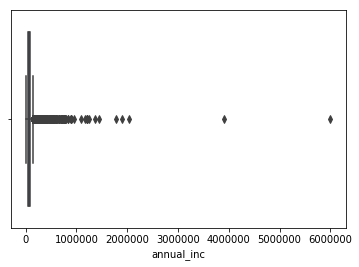

In [21]:
#Annual Income
detect_outlier(data_loan,'annual_inc')

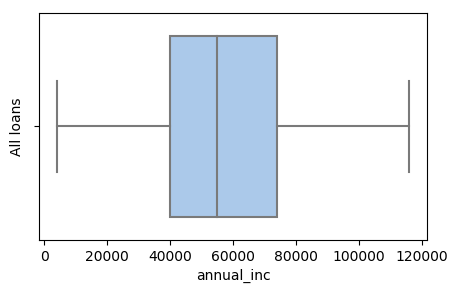

In [22]:
#Get relevant percentiles for annual_inc and see their distribution
data_loan['annual_inc'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Let's remove the outliers in the annual_inc variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['annual_inc'] <= 116000.0]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="annual_inc", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 2.07
count    35723.000000
mean     10573.904067
std       6950.794056
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14675.000000
max      35000.000000
Name: loan_amnt, dtype: float64


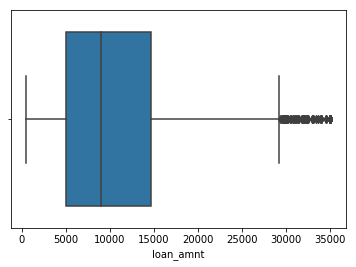

In [23]:
#Loan amount
detect_outlier(data_loan,'loan_amnt')

# There are no noticeable outliers 

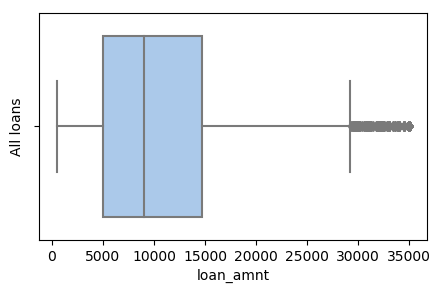

In [24]:
#Get relevant percentiles for loan_amnt and see their distribution
data_loan['loan_amnt'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# There are no noticeable outliers 

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="loan_amnt", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 5.11
count     35723.000000
mean      11707.358984
std       12555.389389
min           0.000000
25%        3502.000000
50%        8316.000000
75%       15651.000000
max      149000.000000
Name: revol_bal, dtype: float64


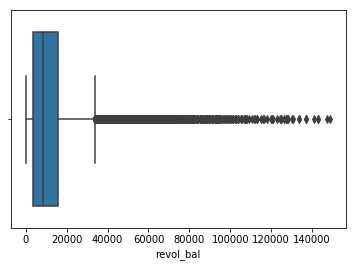

In [25]:
#Revolving balance
detect_outlier(data_loan,'revol_bal')

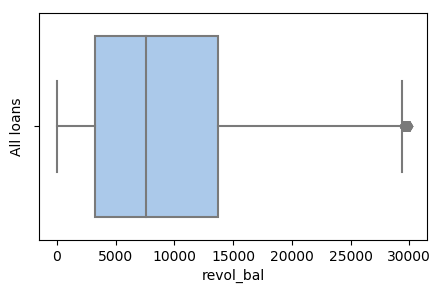

In [26]:
#Get relevant percentiles for revol_bal and see their distribution
data_loan['revol_bal'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Let's remove the outliers in the revol_bal variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['revol_bal'] < 30000.0]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="revol_bal", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 3.01
count    33291.000000
mean         8.916794
std          4.253423
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64


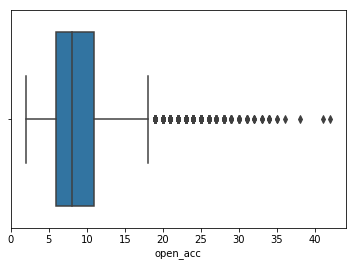

In [27]:
# Open credit lines
detect_outlier(data_loan,'open_acc')

#It doesn't seem to have any noticeable outliers

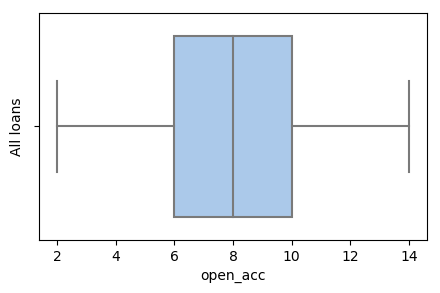

In [28]:
#Get relevant percentiles for open_acc and see their distribution
data_loan['open_acc'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


# Let's remove the outliers in the open_acc variable which are more than 13.0 (90th Percentile)
data_loan = data_loan[data_loan['open_acc'] <= 14.0]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="open_acc", data=data_loan, ax=x1, palette="pastel")
x1.set_ylabel("All loans");

outlier percent is : 2.7
count    29885.000000
mean        43.416441
std        328.654010
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64


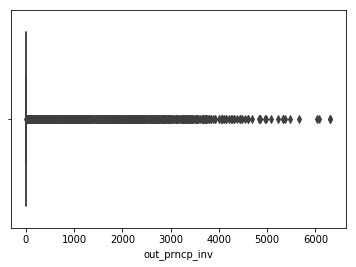

In [29]:
#Remaining outstanding Principal
detect_outlier(data_loan,'out_prncp_inv')

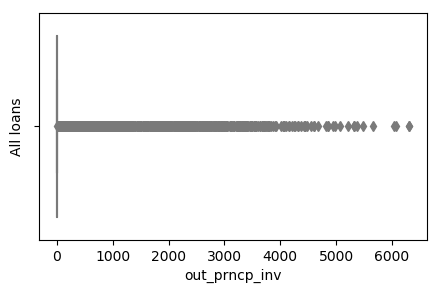

In [30]:
#Get relevant percentiles for out_prncp_inv and see their distribution
data_loan['out_prncp_inv'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# We see that 90 percentile values are 0 and the max is 6307.37. 

#Let's remove the outliers in the out_prncp_inv variable which would skew the analysis otherwise
data_loa = data_loan[data_loan['out_prncp_inv'] < 6307.37]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="out_prncp_inv", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 7.89
count    29885.000000
mean      1986.714648
std       2251.552365
min          0.000000
25%        606.730000
50%       1218.680000
75%       2472.180000
max      22593.340000
Name: total_rec_int, dtype: float64


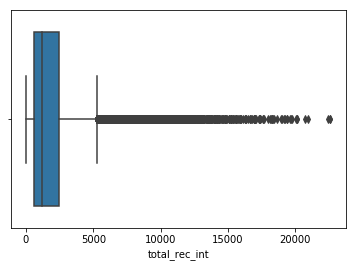

In [31]:
#Interest received till date
detect_outlier(data_loan,'total_rec_int')

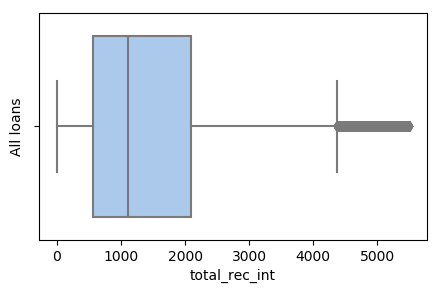

In [32]:
#Get relevant percentiles for total_rec_int and see their distribution
data_loan['total_rec_int'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Let's remove the outliers in the total_rec_int variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['total_rec_int'] < 5500.0]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="total_rec_int", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 5.18
count    27704.000000
mean         1.234501
std          6.418507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        166.429711
Name: total_rec_late_fee, dtype: float64


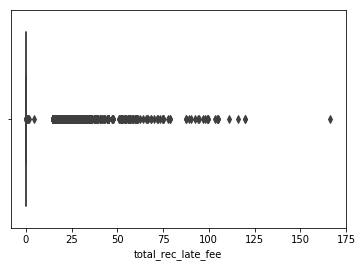

In [33]:
#Late fee received till date
detect_outlier(data_loan,'total_rec_late_fee')

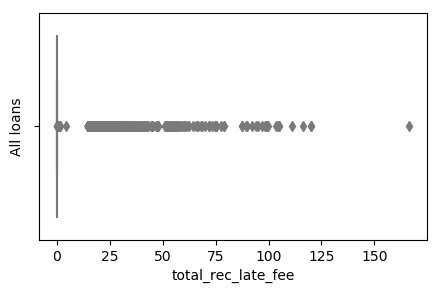

In [34]:
#Get relevant percentiles for total_rec_late_fee and see their distribution
data_loan['total_rec_late_fee'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# We see that 90 percentile values are 0 and the max is 180.2.

# Let's remove the outliers in the total_rec_late_fee variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['total_rec_late_fee'] < 180.2]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="total_rec_late_fee", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 10.71
count    27704.000000
mean      2191.498932
std       3692.842872
min          0.000000
25%        190.630000
50%        447.605000
75%       2672.865000
max      35479.890000
Name: last_pymnt_amnt, dtype: float64


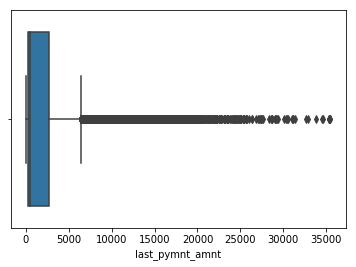

In [35]:
#Last total payment amount received
detect_outlier(data_loan,'last_pymnt_amnt')

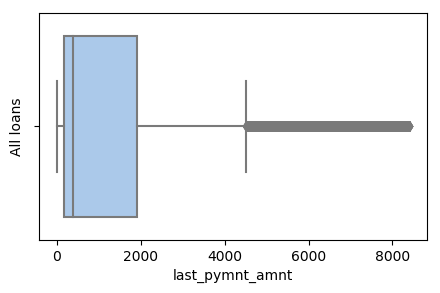

In [36]:
#Get relevant percentiles for last_pymnt_amnt and see their distribution
data_loan['last_pymnt_amnt'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Let's remove the outliers in the total_rec_late_fee variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['last_pymnt_amnt'] < 8400]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="last_pymnt_amnt", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

outlier percent is : 11.63
count    25751.000000
mean        79.358927
std        570.960355
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      21810.310000
Name: recoveries, dtype: float64


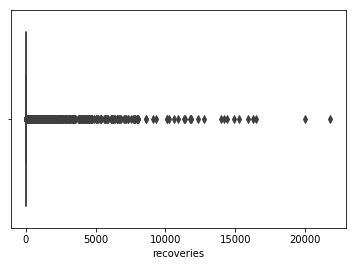

In [37]:
#Post Charge off Gross Recoveries
detect_outlier(data_loan,'recoveries')

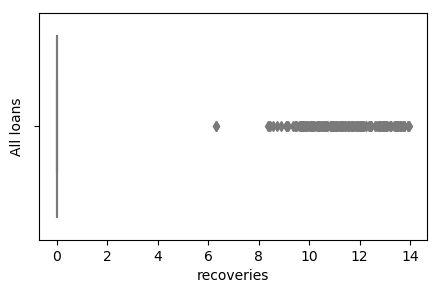

In [38]:
#Get relevant percentiles for recoveries and see their distribution
data_loan['recoveries'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# We see that 80 percentile values are 0 and the max is 29623.350.

# Let's remove the outliers in the recoveries variable which would skew the analysis otherwise
data_loan = data_loan[data_loan['recoveries'] <= 14]

#Plot distribution
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.boxplot(x="recoveries", data=data_loan, ax=x1, palette="pastel");
x1.set_ylabel("All loans");

# Univariate Analysis

#### Unordered Categorical Variables - Rank Frequency Plots

#### Insights:
1. Most of the above Unordered Categorical Variables seem to follow Power Law distribution
2. Debt consolidation is the most frequent reason for loan requests
3. California, New York, Florida and Texas are the states in which the highest amount of loans were issued.
4. The most prevelant home ownership status among borrowers are Rent and Mortgage
5. Around 14% loans have been charged off
6. A loan term of 36 months is more frequent (almost three times) than a term of 60 months
7. Around 42% of loans have not been verified


In [39]:
# Loan status
df_ls=pd.DataFrame({'frequency':data_loan['loan_status'].value_counts()})  #Subsetting the data frame based on aggregation
df_ls.insert(0, 'rank', range(1, len(df_ls)+1)) #Adding a Trivial Column rank
df_ls.reset_index()
df_ls

,rank,frequency
Fully Paid,1,21375
Charged Off,2,1181
Current,3,374


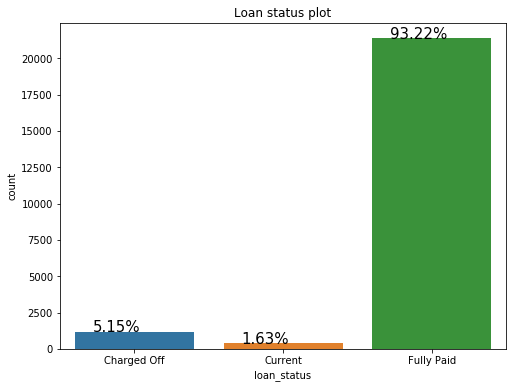

In [40]:
#Visualising Loan status
plt.figure(figsize=(8,6))
ax=sns.countplot(x="loan_status", data=data_loan,label='Loan status')
plt.title("Loan status plot")
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3,str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='black')

In [41]:
#Analyzing some of unordered categorical variables and Checking for Power Law Distribution (Y=cx^b )
#Equivalent of (Y=bx + c) in linear scale

#Writing a function for the same
def power_law_dist(df,col,Label):
    df_sub=pd.DataFrame(data_loan[col].value_counts())  #Subsetting the data frame based on aggregation
    df_sub.insert(0, 'Rank', range(1, len(df_sub)+1)) #Adding a Trivial Column rank
    a=sns.regplot(x="Rank", y=col, data=df_sub,label=Label) #Plotting the Rank Frequncy Distribution Plot
    a.set_yscale('log') #Changing the y scale from linear to log
    a.set_xscale('log') #Changing the x scale from linear to log
    a.legend(loc="best") #Showing the label as legend
    return df_sub #Returning the data frame to be visualised before the graph

,Rank,purpose
debt_consolidation,1,10197
credit_card,2,2911
other,3,2620
home_improvement,4,1524
major_purchase,5,1523
car,6,1077
small_business,7,862
wedding,8,636
medical,9,425
moving,10,394


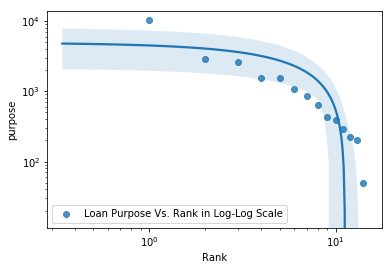

In [42]:
#Loan Purpose
power_law_dist(data_loan,'purpose','Loan Purpose Vs. Rank in Log-Log Scale')

,Rank,addr_state
CA,1,4140
NY,2,2235
FL,3,1645
TX,4,1514
NJ,5,995
PA,6,883
IL,7,868
MA,8,779
GA,9,766
VA,10,757


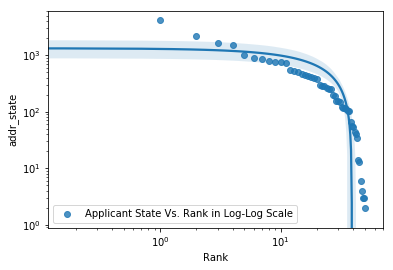

In [43]:
#Applicant State
power_law_dist(data_loan,'addr_state','Applicant State Vs. Rank in Log-Log Scale')

Few unordered categorical variables seem to follow Power Law distribution

#### Ordered Categorical Variables - Univariate Analysis - Frequency distribution

#### Insights:
1. Most of the loans are for Category B followed by A and C
2. The average interest rate across all loans is approx 12%
3. The average annual income (excluding the outliers) of the borrowers is close to 6000
4. Most borrowers 10 or more years of experience
3. Most borrowers have ~ 7 open credit lines the borrower's credit file
4. Most borrowers have have less 2 30+ days past-due incidents
5. Most borrowers have have made 3 or less enquiries in the past 6 months
6. Most borrowers have 1 or less derogatory public records


Text(0,0.5,'All loans')

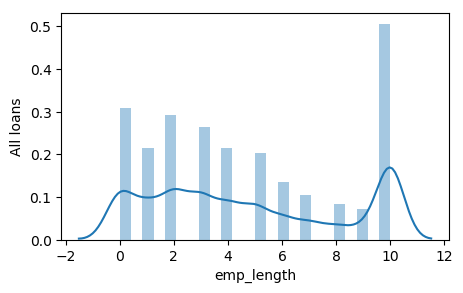

In [44]:
#Employment length (15 is used to mark the invalid values n/a)
data_loan['emp_length'] = data_loan['emp_length'].replace(['10+ years', '< 1 year'], ['10 years','0 year']).str.rstrip('years')
data_loan['emp_length'] = data_loan['emp_length'].replace(['n/'], ['15'])
data_loan['emp_length'] = data_loan['emp_length'].astype('float')


f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.emp_length, ax=x1)
x1.set_ylabel("All loans")

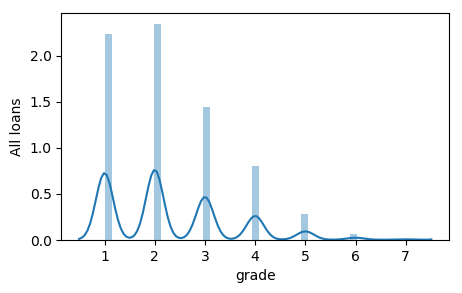

In [45]:
#Grade
data_loan['grade'] = data_loan['grade'].replace(['A', 'B','C','D','E','F','G'], ['1', '2','3','4','5','6','7'])
data_loan['grade'] = data_loan['grade'].astype('float')


f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.grade, ax=x1);
x1.set_ylabel("All loans");

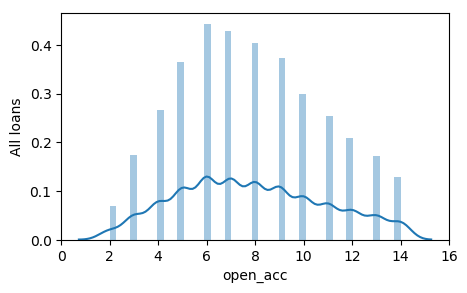

In [46]:
# No of open credit lines
f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.open_acc, ax=x1);
x1.set_ylabel("All loans");

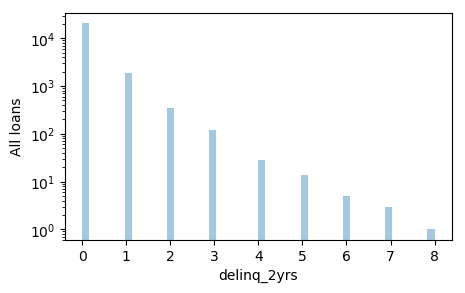

In [47]:
#Frequency for  30+ days past-due incidences (in the past 2 years)
#We have converted it to a log scale 

f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.delinq_2yrs, ax=x1, kde=False)
x1.set_ylabel("All loans")
x1.set_yscale('log')

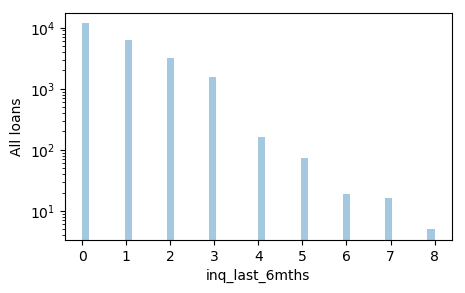

In [48]:
#Frequency for  enquiries in the past six months
#We have converted it to a log scale 

f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.inq_last_6mths, ax=x1, kde=False)
x1.set_ylabel("All loans")
x1.set_yscale('log')

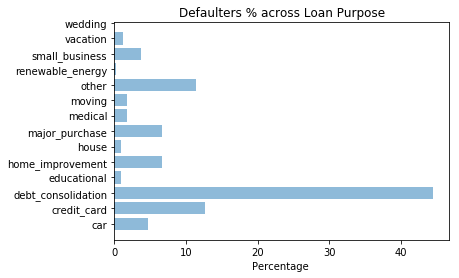

In [49]:
#Percentage of loans by loan purpose
groupedvalues_HR_bar=data_loan.groupby(['purpose']).count().reset_index()

groupedvalues_HR_bar['Hr_br_perc'] = np.nan

for i in range(0,len(groupedvalues_HR_bar)-1):
    groupedvalues_HR_bar['Hr_br_perc'][i]=(groupedvalues_HR_bar['loan_amnt'][i]/sum(groupedvalues_HR_bar['loan_amnt']))*100
#loan_amnt is simply taken to get the count as the data is already aggregated by loan purpose
    
groupedvalues_HR_bar[['purpose','Hr_br_perc']]

plt.barh(list(groupedvalues_HR_bar['purpose']), list(groupedvalues_HR_bar['Hr_br_perc']), align='center', alpha=0.5)

plt.xlabel('Percentage ')
plt.title('Defaulters % across Loan Purpose')
 
plt.show()

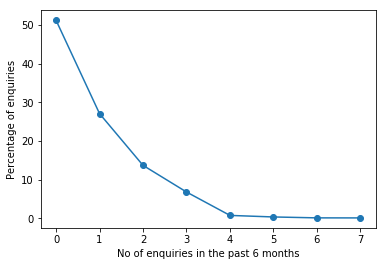

In [50]:
#Percentage of enquiries in the past 6 months
groupedvalues_line=data_loan.groupby(['inq_last_6mths']).count().reset_index()

groupedvalues_line['lin_perc'] = np.nan

for i in range(0,len(groupedvalues_line)-1):
    groupedvalues_line['lin_perc'][i]=(groupedvalues_line['loan_amnt'][i]/sum(groupedvalues_line['loan_amnt']))*100
#loan_amnt is simply taken to get the count as the data is already aggregated by no. inquiry in last 6 months
    
groupedvalues_line[['inq_last_6mths','lin_perc']]
plt.plot(list(groupedvalues_line['inq_last_6mths']), list(groupedvalues_line['lin_perc']), marker='o')
plt.xlabel('No of enquiries in the past 6 months')
plt.ylabel('Percentage of enquiries')

plt.show()

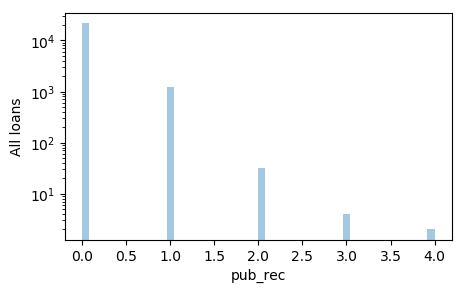

In [51]:
#Frequency for derogatory public records
#We have converted it to a log scale

f, (x1) = plt.subplots(1, 1, figsize=(5, 3),  dpi=100)
sns.distplot(data_loan.pub_rec, ax=x1, kde=False)
x1.set_ylabel("All loans")
x1.set_yscale('log')

### Univariate analysis for  continuous numerical variables

In [52]:
data_loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','recoveries','collection_recovery_fee',\
           'last_pymnt_amnt','dti']].describe()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,recoveries,collection_recovery_fee,last_pymnt_amnt,dti
count,22930.000000,22930.000000,22930.000000,22930.000000,22930.00000,22930.000000,22930.000000,22930.000000
mean,8413.455081,8260.450283,7820.291800,11.179038,0.08495,0.010109,1513.470169,12.762822
std,5103.178873,4920.797780,4843.771751,3.317773,0.98305,0.203927,1994.708857,6.694726
min,500.000000,500.000000,0.000000,5.420000,0.00000,0.000000,0.000000,0.000000
25%,4800.000000,4800.000000,4200.000000,7.910000,0.00000,0.000000,193.375000,7.540000
50%,7500.000000,7200.000000,7000.000000,11.110000,0.00000,0.000000,450.425000,12.730000
75%,11200.000000,11000.000000,10000.000000,13.490000,0.00000,0.000000,2273.147500,17.970000
max,35000.000000,35000.000000,35000.000000,23.520000,13.96000,5.780000,8397.820000,29.990000


### Segmented Univariate Analysis

### Variable : Employment length (emp_length)

#### Determine effect of employment length on loan status, loan amounts issued and interest rates

#### Insights
1. People having employment tenure of 10 or more years constitute the largest proportion of borrowers and consequently have the largest number of charged off loans whereas in terms of ratio, borrowers with less than 5 years of employment length tend to get charged off on loans more often. 
2. The loan amounts issued to borrowers increase steadily with employment tenure on an average.
3. It is interesting to note that borrowers who get charged off on loans tend to request for higher loan amounts as compared to borrowers who have fully paid their loans.
4. Borrowers who have been charged off on loans have higher average interest rates across employment lengths as compared to borrowers who have paid off their loans
5. Interest rates do not vary across employment lengths on an average.


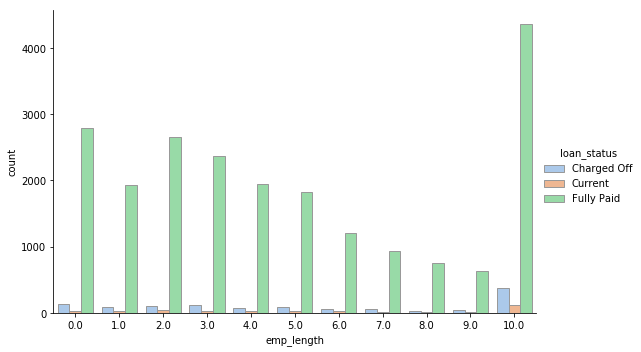

In [53]:
ax = sns.catplot(x="emp_length", hue="loan_status", kind="count",
            palette="pastel", edgecolor=".6", aspect=1.5,
            data=data_loan);


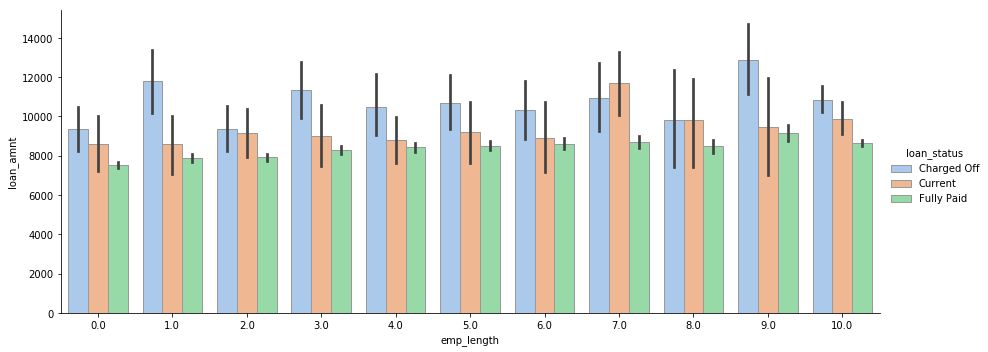

In [54]:
ax = sns.catplot(x="emp_length",y ="loan_amnt", hue="loan_status", 
                 kind="bar", palette="pastel", edgecolor=".6",aspect=2.5,
            data=data_loan);

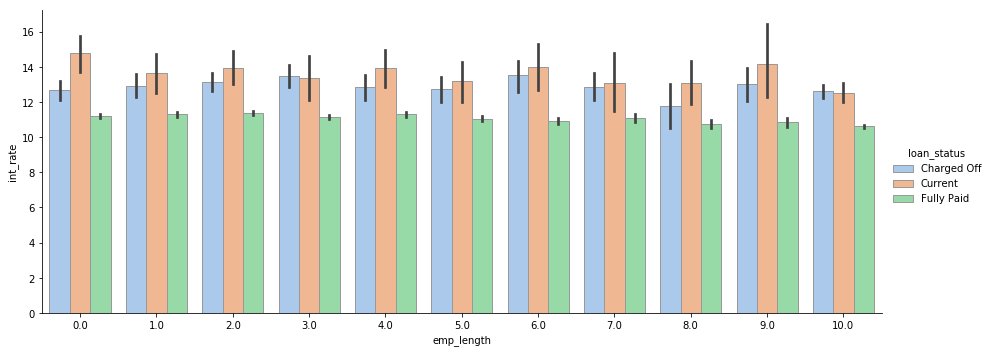

In [55]:
ax = sns.catplot(x="emp_length",y ="int_rate", hue="loan_status",
                 kind="bar", palette="pastel", edgecolor=".6",aspect=2.5,
            data=data_loan);


### Variable : Home ownership (home_ownership)

#### Determine effect of home ownership on loan status, loan amounts issued and interest rates

#### Insights
1. Borrowers having mortages and living on rent constitute the largest proportion of people who have defaulted on their loans and have been charged off.
2. Higher loan amounts have been issued to borrowers having mortgages. 
3. There is no significant variation in loan amounts issued to borrowers owing properties or living on rent.
4. Borrowers who have been charged off have significantly higher loan amounts than those who have repaid their loans.
5. There is no significant variation in average interest rates offered to borrowers across different types of home ownerships.
6. The interest rates offered to charged off borrowers are significantly higher in average than those who have paid their loans in full.

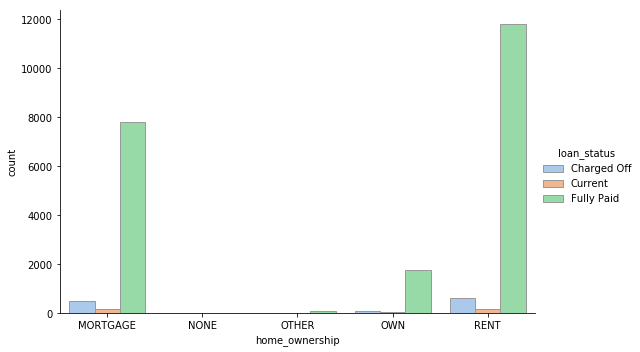

In [56]:
ax = sns.catplot(x="home_ownership", hue="loan_status", kind="count",
            palette="pastel", edgecolor=".6", aspect=1.5,
            data=data_loan);

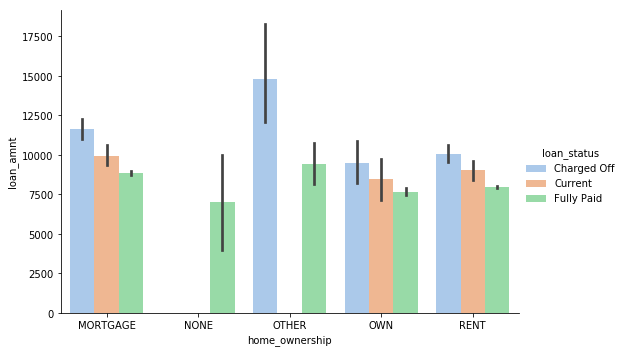

In [57]:
ax = sns.catplot(x="home_ownership",y ="loan_amnt", hue="loan_status",
                 kind="bar", palette="pastel",aspect=1.5,
            data=data_loan);


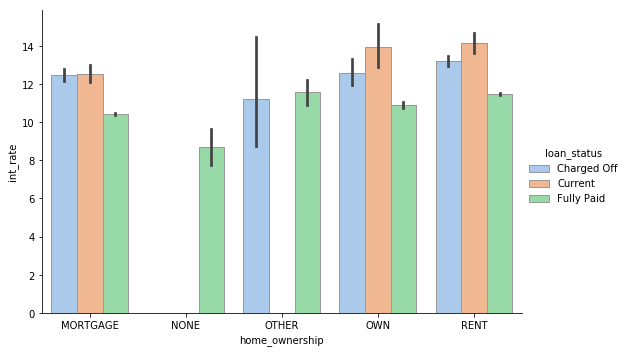

In [58]:
ax = sns.catplot(x="home_ownership",y ="int_rate", hue="loan_status",
                 kind="bar", palette="pastel", edgecolor=".6",aspect=1.5,
            data=data_loan);


### Variable : Purpose of loan request (purpose)

#### Determine effect of loan purpose on loan status, loan amounts issued and interest rates


#### Insights
1. Debt consolidation is the most frequent purpose stated for loan requests and leads to the highest number of charged off loans whereas, ratio-wise, small businesses, vacations, house loans have higher ratio of charged off to paid loans and are therefore riskier.
2. Higher loan amounts have been issued to borrowers for small businesses, debt consolidations and for credit cards on an average 
3. The average amounts of loan issued to charged off borrowers for all the above stated purposes are comparatively higher than those with similar fully paid loans.
4. The average interest rates for home loans are higher than other types of loans, closely followed by loans for debt consolidation, small businesses and credit cards.
5. The interest rates offered to charged off borrowers are significantly higher than those who have paid their loans in full.

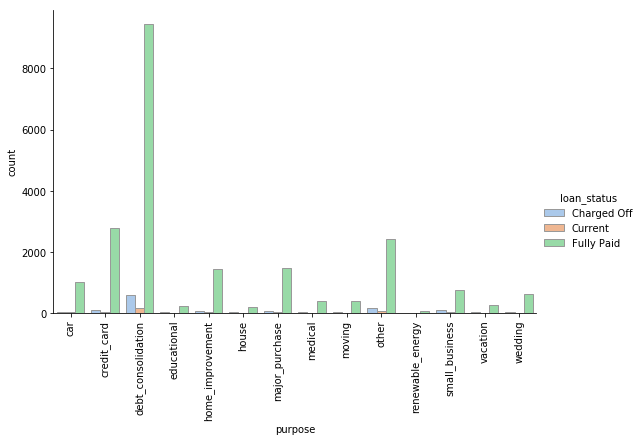

In [59]:
ax = sns.catplot(x="purpose", hue="loan_status", kind="count",
            palette="pastel", edgecolor=".6", aspect=1.5,
            data=data_loan);

ax.set_xticklabels(rotation=90);

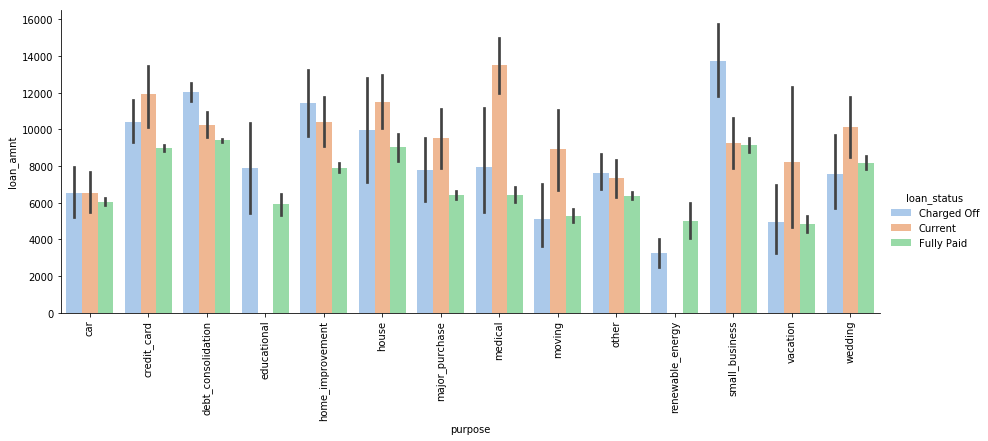

In [60]:
ax = sns.catplot(x="purpose",y ="loan_amnt", hue="loan_status",
                 kind="bar", palette="pastel",aspect=2.5,
            data=data_loan);
ax.set_xticklabels(rotation=90);

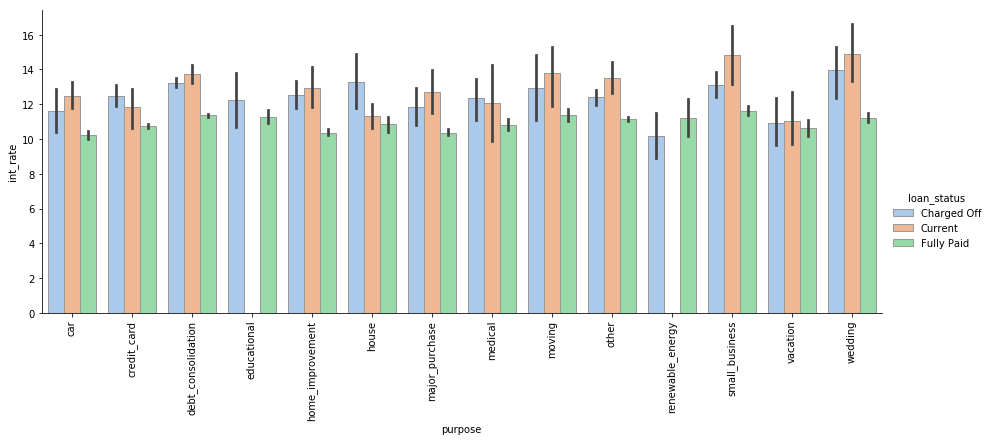

In [61]:
ax = sns.catplot(x="purpose",y ="int_rate", hue="loan_status",
                 kind="bar", palette="pastel", edgecolor=".6",aspect=2.5,
            data=data_loan);
ax.set_xticklabels(rotation=90);

### Variable : Debt to Income ratio (dti)

#### Determine effect of dti on loan status

#### Insights
1. The debt to income ratio of charged off loans are, on an average, higher than those of loans which have been paid fully. This is intuitive as the higher the debt of a borrower the less likely he/she is able to pay off the entire loan amount.

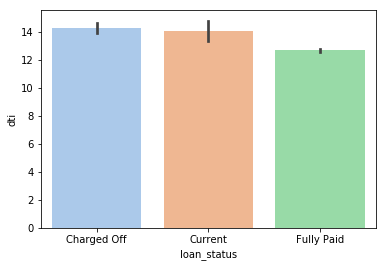

In [62]:
ax = sns.barplot(x="loan_status", y="dti", data=data_loan, palette="pastel")


### Variable :  Total credit revolving balance (revol_bal) 

#### Determine effect of total credit revolving balance on loan status

#### Insights
1. The average number of total credit revolving balance of borrowers do not vary significantly for charged off and fully paid loans

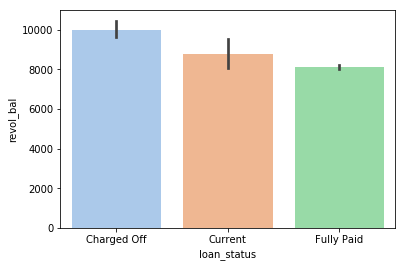

In [63]:
ax1 = sns.barplot(x="loan_status", y="revol_bal", data=data_loan, palette="pastel")

### Variable : Revolving line utilization rate (revol_util)

#### Determine effect of revolving line utilization rate on  loan status

#### Insights
1. The average revolving line utilization rate for borrowers who have been charged off are much higher than borrowers who ahve repaid their loans 
2. The average revol_bal value for charged off borrowers is greater than 50

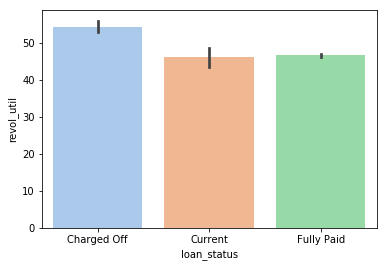

In [64]:
ax = sns.barplot(x="loan_status", y="revol_util", data=data_loan, palette="pastel")

### Variable :  The number of open credit lines (open_acc) 

#### Determine effect of the number of open credit lines on loan status

#### Insights
1. The average number of open credit lines on the borrowers credit file do not vary significantly for charged off vs fully paid loans.
2. The average number of open credit lines for borrowers is around 7

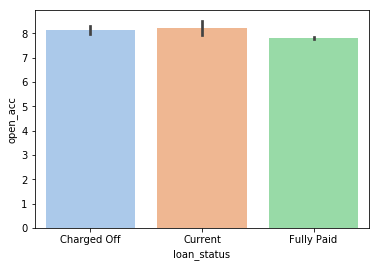

In [65]:
sns.barplot(x="loan_status", y="open_acc", data=data_loan, palette="pastel");

### Bivariate Data Analysis 

### Variables by Loan Status

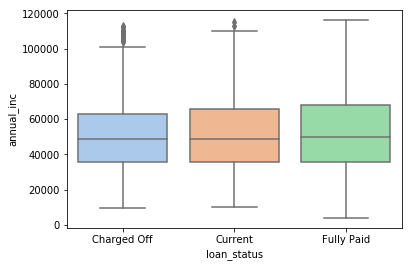

In [66]:
# Annual income vs loan status

sns.boxplot(x="loan_status", y="annual_inc", data=data_loan, palette="pastel");

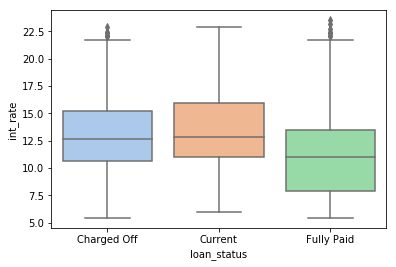

In [67]:
#Interest rate distribution
sns.boxplot(x="loan_status", y="int_rate", data=data_loan, palette="pastel");

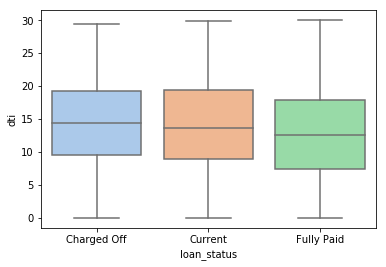

In [68]:
#Debt to income ratio with Loan status
sns.boxplot(x="loan_status", y="dti", data=data_loan, palette="pastel");

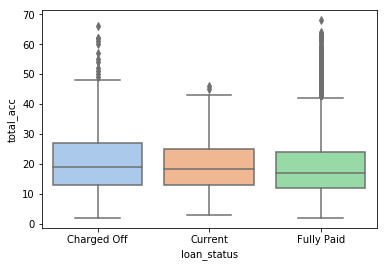

In [69]:
#Total account with Loan status
sns.boxplot(x="loan_status", y="total_acc", data=data_loan, palette="pastel");


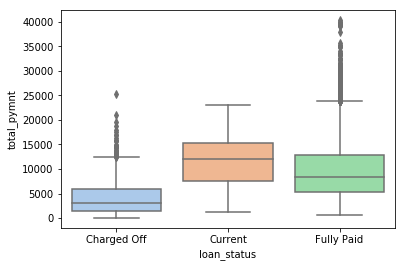

In [70]:
#Total payment with Loan status
sns.boxplot(x="loan_status", y="total_pymnt", data=data_loan, palette="pastel");

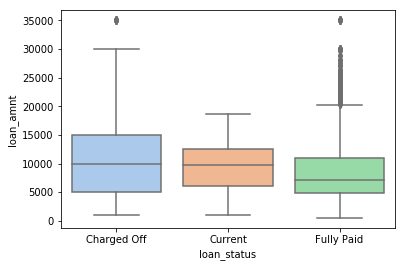

In [71]:
#Loan amount with Loan status
sns.boxplot(x="loan_status", y="loan_amnt", data=data_loan, palette="pastel");

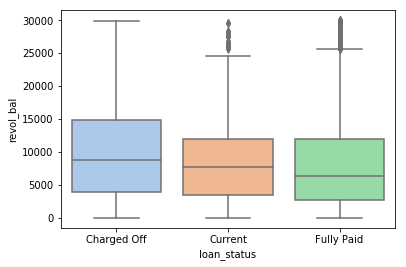

In [72]:
#Revolving balance with Loan status
sns.boxplot(x="loan_status", y="revol_bal", data=data_loan, palette="pastel");

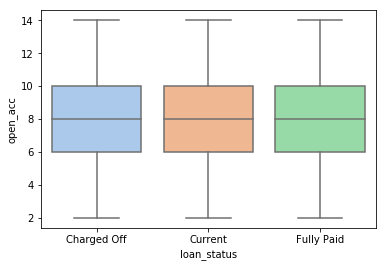

In [73]:
#Open credit lines with Loan status

sns.boxplot(x="loan_status", y="open_acc", data=data_loan, palette="pastel")

### Analysis of on continuous variables

In [74]:
# Analyzing correlation between the numeric variables in the dataset by way of a correlation matrix

# Function for the same
def correlation_matrix(df):
    x = df.select_dtypes(include=[np.int64,np.float64])
    cor = x.corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(cor, cmap="YlGnBu", annot=True)
    plt.show()

In [75]:
# Retaining the category type of grade
data_loan['grade'] = data_loan['grade'].astype('category')
# Function for plotting a box plot with multiple columns
def box_plot_draw(df):
    sns.boxplot(x="variable", y="value", data=pd.melt(df))
    plt.yscale('log')
    plt.show()

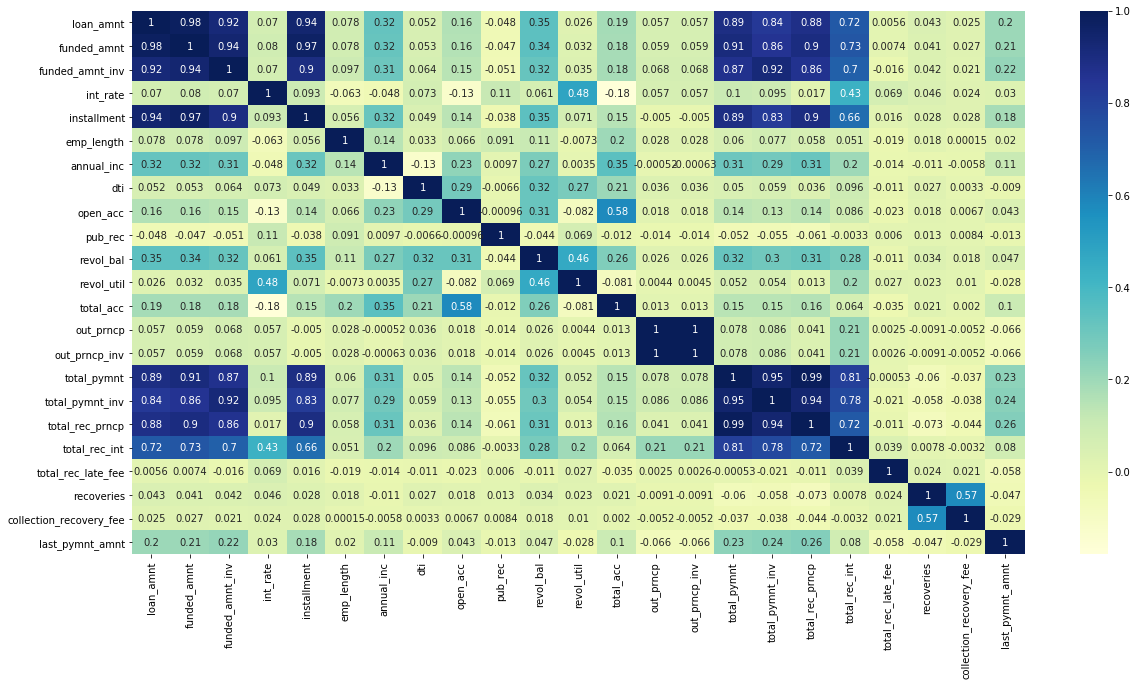

In [76]:
correlation_matrix(data_loan)

#### Removing columns that are highly correlated 

#### Insights:
1. Payments received to date for total amount funded(total_pymnt), Payments received to date for portion of total amount funded by investors(total_pymnt_inv) and Principal received to date(total_rec_prncp) are highly correlated.
2. The listed amount of the loan applied for by the borrower(loan_amnt),total amount committed to that loan at that point in time(funded_amnt),total amount committed by investors for that loan at that point in time(funded_amnt_inv) are highly correlated.
3. Remaining outstanding principal for total amount funded(out_prncp) and Remaining outstanding principal for portion of total amount funded by investors(out_p.rncp_inv) are highly correlated.
4. Post charge off gross recovery(recoveries) and post charge off collection fee(collection_recovery_fee) are highly correlated.

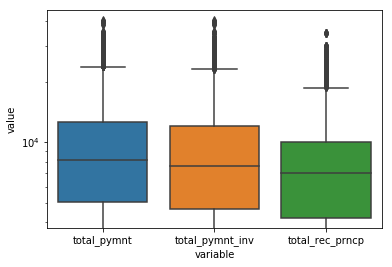

In [77]:
#Verifying that total payment, total payment invested and total principal received 
correlated_df1= data_loan[['total_pymnt','total_pymnt_inv','total_rec_prncp']]
box_plot_draw(correlated_df1)

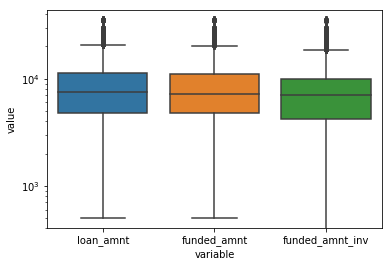

In [78]:
#Verifying that loan amount, funded amount and funded amount invested 
correlated_df2= data_loan[['loan_amnt','funded_amnt','funded_amnt_inv']]
box_plot_draw(correlated_df2)

#### Dropping variables as per bivariate analysis

In [79]:
# Dropping funded amount and funded amount invested columns as they are correlated to loan amount
data_loan.drop(data_loan[['funded_amnt','funded_amnt_inv']],axis=1,inplace=True)

# Dropping total payment invested and total principal received columns as they are correlated to total payment
data_loan.drop(data_loan[['total_pymnt_inv','total_rec_prncp']],axis=1,inplace=True)

# Dropping outstanding principal and outstanding principal invested as they are correlated and most values are zero
data_loan.drop(data_loan[['out_prncp_inv','out_prncp']],axis=1,inplace=True)

# Dropping recoveries and collection recovery fee they are correlated and most values are zero
data_loan.drop(data_loan[['recoveries','collection_recovery_fee']],axis=1,inplace=True)

# Dropping total late fee received as most values are zero and recovery data does not add value to our analysis
data_loan.drop(data_loan[['total_rec_late_fee']],axis=1,inplace=True)

data_loan.dtypes

loan_amnt                 int64
term                   category
int_rate                float64
installment             float64
grade                  category
sub_grade                object
emp_length              float64
home_ownership         category
annual_inc              float64
verification_status    category
issue_d                  object
loan_status            category
purpose                category
addr_state             category
dti                     float64
delinq_2yrs            category
earliest_cr_line         object
inq_last_6mths         category
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_rec_int           float64
last_pymnt_d             object
last_pymnt_amnt         float64
last_credit_pull_d       object
dtype: object

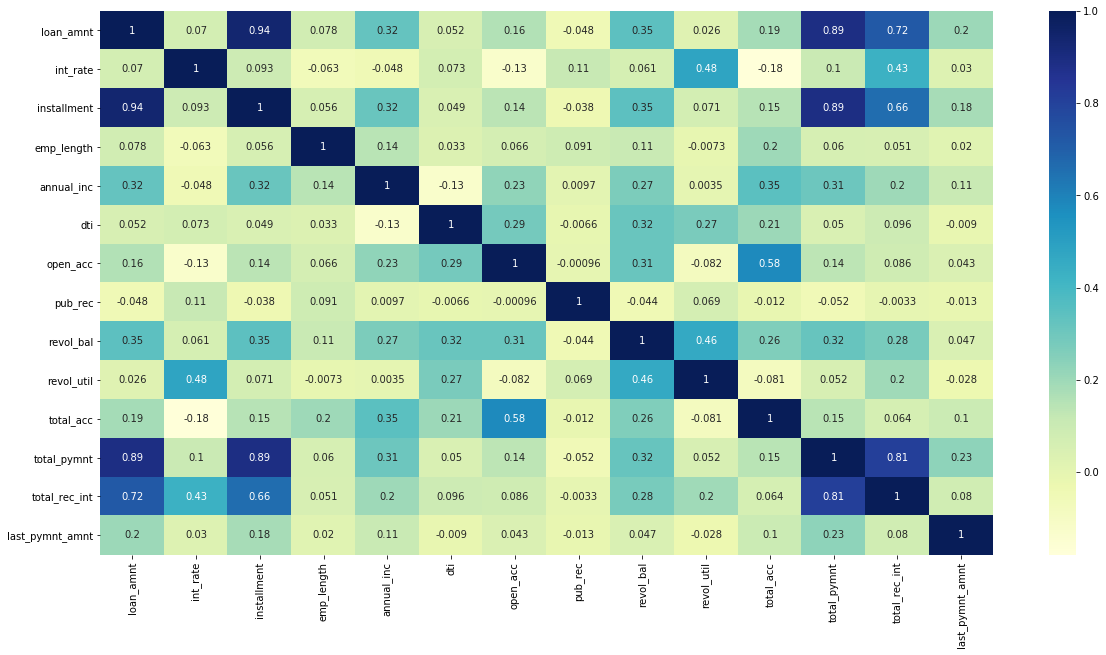

In [80]:
# Verifying correlations after dropping columns
correlation_matrix(data_loan)

In [81]:
# From the correlation matrix as well as intuitively we can understand that installment
# and total interest received are highly correlated to total payment which in turn, is highly correlated to loan amount

# Dropping interest rate,installment,total interest received and total payment columns
data_loan.drop(data_loan[['installment','total_rec_int', 'total_pymnt']],axis=1,inplace=True)

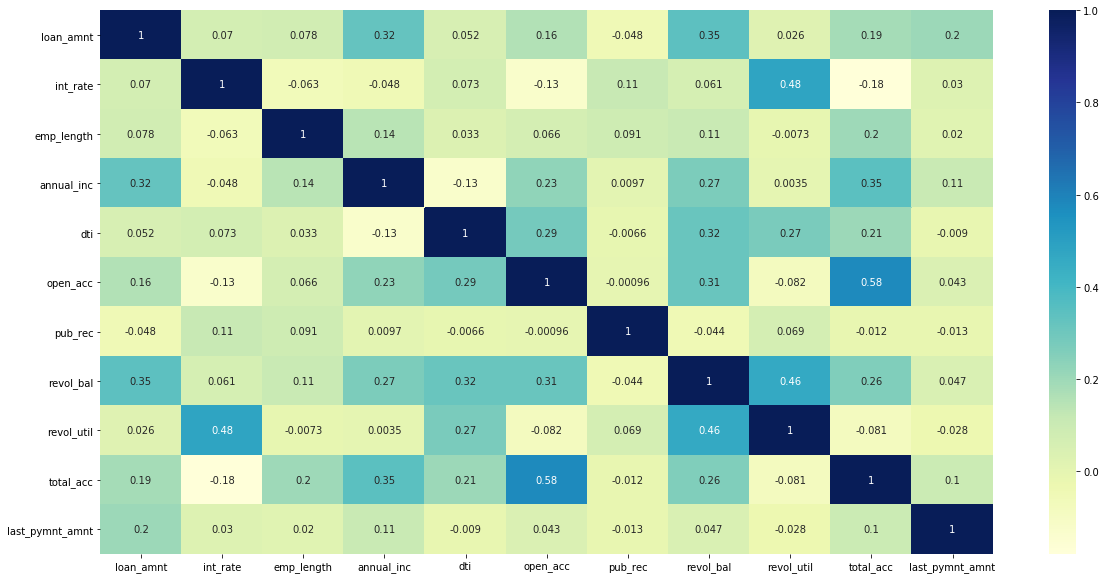

In [82]:
# Verifying correlations after dropping columns
correlation_matrix(data_loan)

### Bivariate analysis on categorical variables

#### Insights:

1. While Debt consolidation, Other, Credit card are the most frequent purpose for loan requests across loan statuses. Small business, Renewable energy and Educational have higher percentage of charged off loans.

2. Higher the term, more are the chances of loans being charged off.

3. Even though LC verified the income and the sources of income, they are the interestingly a big contributor to charged off loans. Maybe having a look at the verification process would help.

4. Loans having higher interest rate slabs (grades F,G) have higher chances of charged off loans

5. Loans requests having home ownership of rent and mortgage tend to have higher chances of being charged off

6. California, Texas, New York and Florida are the states in which the highest amount of loans were issued.

In [83]:
# Function for bivariate analysis on categorical variables
def biv_cat(df,col1,col2):
    updated_df=pd.crosstab(df[col1], df[col2],margins=True)
    updated_df.rename(index=str,columns={'All':'Total'},inplace=True)
    updated_df['Charged Off %']=round(100*(updated_df['Charged Off']/updated_df['Total']),2)
    updated_df.drop(['All'],inplace=True)
    sorted_df=updated_df.sort_values(['Charged Off %'], ascending=False)
    return(sorted_df)

In [84]:
# Function to draw bar plots for bivariate analysis on categorical variables
def bar_plot_draw(df,col,deg,size):
    df=df.reset_index()
    temp_df=pd.DataFrame({col:df[col],'Charged_off':df['Charged Off'],'Total':df['Total']})
    plt.figure(figsize=(30, 10), dpi=200)
    ax = temp_df.plot.bar(x=col,rot=deg,figsize=(size, 5))

In [85]:
# Loan purpose vs Loan status
ls_pls=biv_cat(data_loan,'purpose','loan_status')
ls_pls

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
purpose,,,,,
small_business,88,22,752,862,10.21
vacation,21,5,263,289,7.27
house,12,2,189,203,5.91
medical,25,2,398,425,5.88
debt_consolidation,592,156,9449,10197,5.81
other,149,63,2408,2620,5.69
educational,11,0,209,220,5.00
home_improvement,64,32,1428,1524,4.20
renewable_energy,2,0,47,49,4.08


<Figure size 6000x2000 with 0 Axes>

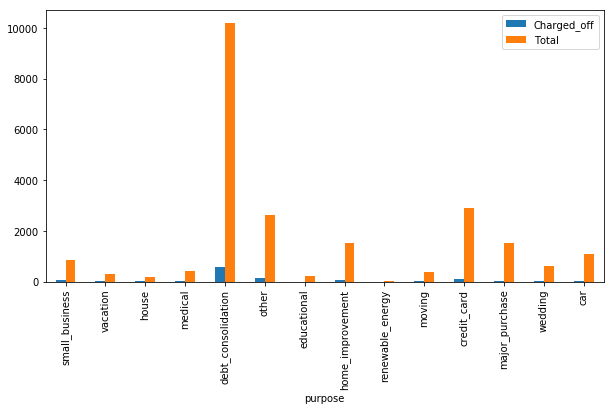

In [86]:
bar_plot_draw(ls_pls,'purpose',90,10)

In [87]:
# Term vs Loan status
ls_term=biv_cat(data_loan,'term','loan_status')
ls_term

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
term,,,,,
60 months,412,374,2873,3659,11.26
36 months,769,0,18502,19271,3.99


<Figure size 6000x2000 with 0 Axes>

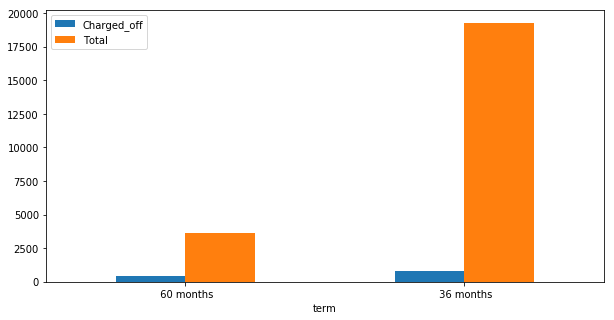

In [88]:
bar_plot_draw(ls_term,'term',0,10)

In [89]:
# Verification status vs Loan status
ls_vs=biv_cat(data_loan,'verification_status','loan_status')
ls_vs

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
verification_status,,,,,
Verified,357,99,4727,5183,6.89
Source Verified,284,136,5601,6021,4.72
Not Verified,540,139,11047,11726,4.61


<Figure size 6000x2000 with 0 Axes>

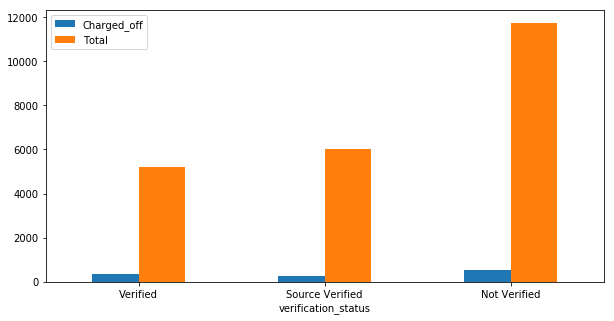

In [90]:
bar_plot_draw(ls_vs,'verification_status',0,10)

In [91]:
# Grade vs Loan status
ls_grade=biv_cat(data_loan,'grade','loan_status')
ls_grade

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
grade,,,,,
7.0,10,1,31,42,23.81
6.0,40,12,163,215,18.60
5.0,108,25,761,894,12.08
4.0,181,57,2316,2554,7.09
3.0,303,93,4200,4596,6.59
2.0,369,158,6966,7493,4.92
1.0,170,28,6938,7136,2.38


<Figure size 6000x2000 with 0 Axes>

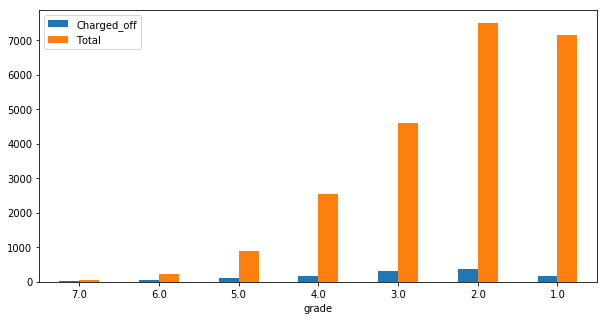

In [92]:
bar_plot_draw(ls_grade,'grade',0,10)

In [93]:
# Home ownership vs Loan status
ls_grade=biv_cat(data_loan,'home_ownership','loan_status')
ls_grade

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
home_ownership,,,,,
OTHER,4,0,59,63,6.35
MORTGAGE,493,175,7795,8463,5.83
OWN,96,41,1737,1874,5.12
RENT,588,158,11782,12528,4.69
NONE,0,0,2,2,0.00


<Figure size 6000x2000 with 0 Axes>

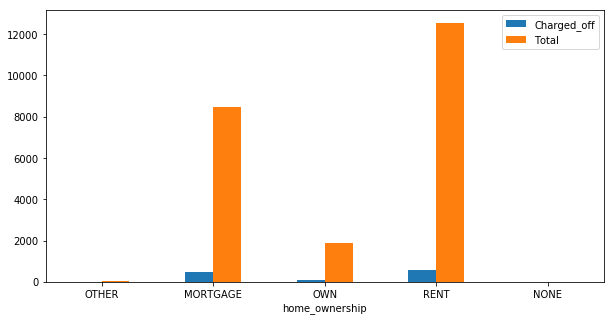

In [94]:
bar_plot_draw(ls_grade,'home_ownership',0,10)

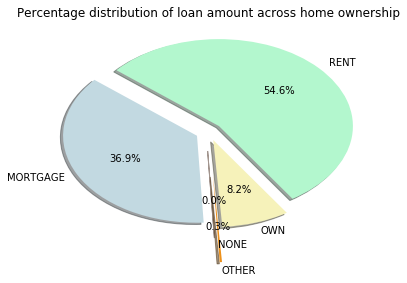

In [95]:
#Pie chart showing the percentage distribution of loans across home owenership categories
groupedvalues_Pie=data_loan.groupby(['home_ownership']).count().reset_index()
groupedvalues_Pie

Pie_data = groupedvalues_Pie["home_ownership"]
Var_cnt = groupedvalues_Pie["loan_amnt"] #This is to just take the count as the data is already aggregated by home ownership

colors = ["#C2D9E1", "#EC9766", "#ED911B", "#F6F2BA", "#B3F7CE"]
explode = (0.1, 0.2, 0.5, 0.1, 0.1)  
plt.pie(Var_cnt, labels=Pie_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage distribution of loan amount across home ownership")
plt.show()

In [96]:
# State address vs Loan status
ls_state=biv_cat(data_loan,'addr_state','loan_status')
ls_state

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off %
addr_state,,,,,
NE,1,0,1,2,50.00
ID,1,0,3,4,25.00
MS,2,0,12,14,14.29
NV,26,6,252,284,9.15
UT,12,1,138,151,7.95
TN,1,0,12,13,7.69
SD,3,1,37,41,7.32
GA,56,8,702,766,7.31
IL,60,14,794,868,6.91


<Figure size 6000x2000 with 0 Axes>

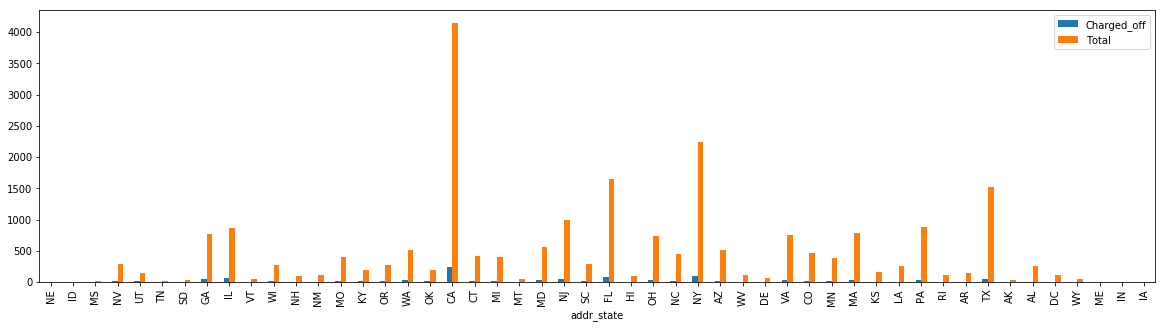

In [97]:
bar_plot_draw(ls_state,'addr_state',90,20)

### Derived Metrics 

### Derived variables: issue_year & issue_month

### Insights:
1. The total number of loans issued rises significantly through the years, Possible due to a recovery in the U.S economy after 2008.
2. The total number of charged off loans also increases year on year 
3. The total number of charged off loans show a marginal increase in the months of Oct, Nov & Dec
4. The average loan amounts issued for charged off loans are higher than loans that are fully paid across all years (2011 cannot be considered as it has a lot of current loans)

### Determine effect of issue year and month on loan amounts as well of number of loans issued 

In [98]:
# Lets' transform the issue dates by year and month
dt_series = pd.to_datetime(data_loan['issue_d'])
data_loan['issue_year'] = dt_series.dt.year
data_loan['issue_month'] = dt_series.dt.strftime('%b')
data_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year,issue_month
0,5000,36 months,10.65,2.0,B2,10.0,RENT,24000.0,Verified,December-2011,...,3,0,13648,83.7,9,January-2015,171.62,May-2016,2011,Dec
2,2400,36 months,15.96,3.0,C5,10.0,RENT,12252.0,Not Verified,December-2011,...,2,0,2956,98.5,10,June-2014,649.91,May-2016,2011,Dec
3,10000,36 months,13.49,3.0,C1,10.0,RENT,49200.0,Source Verified,December-2011,...,10,0,5598,21.0,37,January-2015,357.48,April-2016,2011,Dec
5,5000,36 months,7.90,1.0,A4,3.0,RENT,36000.0,Source Verified,December-2011,...,9,0,7963,28.3,12,January-2015,161.03,January-2016,2011,Dec
6,7000,60 months,15.96,3.0,C5,8.0,RENT,47004.0,Not Verified,December-2011,...,7,0,17726,85.6,11,May-2016,1313.76,May-2016,2011,Dec


Text(0,0.5,'Total loans issued')

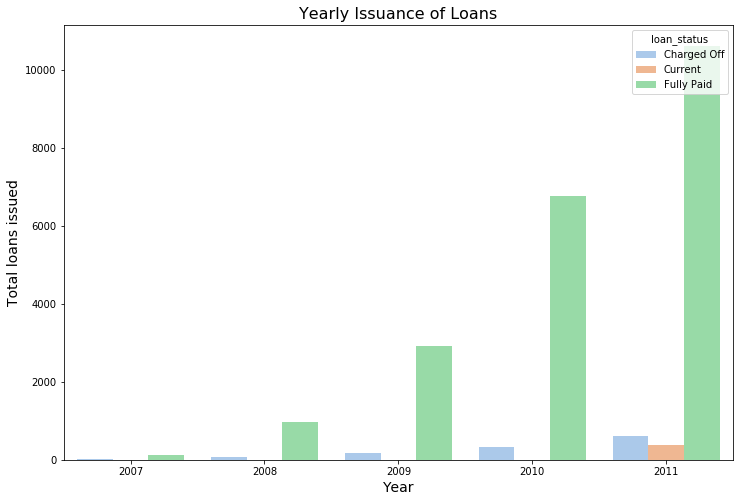

In [99]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='issue_year', hue='loan_status', data=data_loan, palette="pastel");
plt.title('Yearly Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total loans issued', fontsize=14)

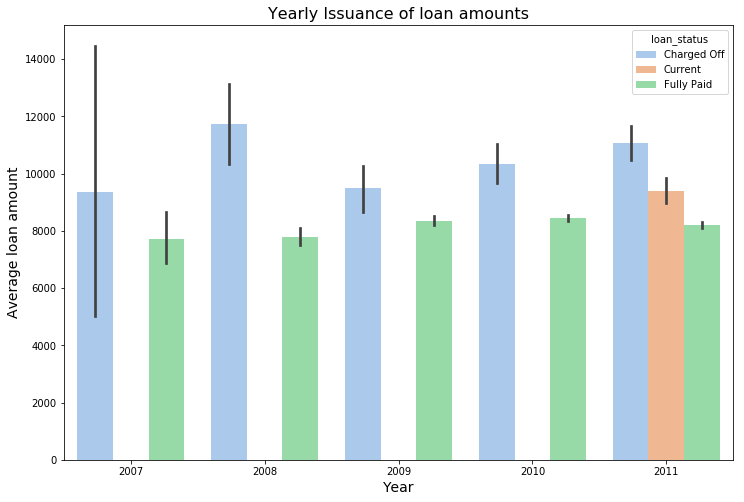

In [100]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="issue_year", y="loan_amnt", hue="loan_status", data=data_loan, palette="pastel");
plt.title('Yearly Issuance of loan amounts', fontsize=16);
plt.xlabel('Year', fontsize=14);
plt.ylabel('Average loan amount', fontsize=14);


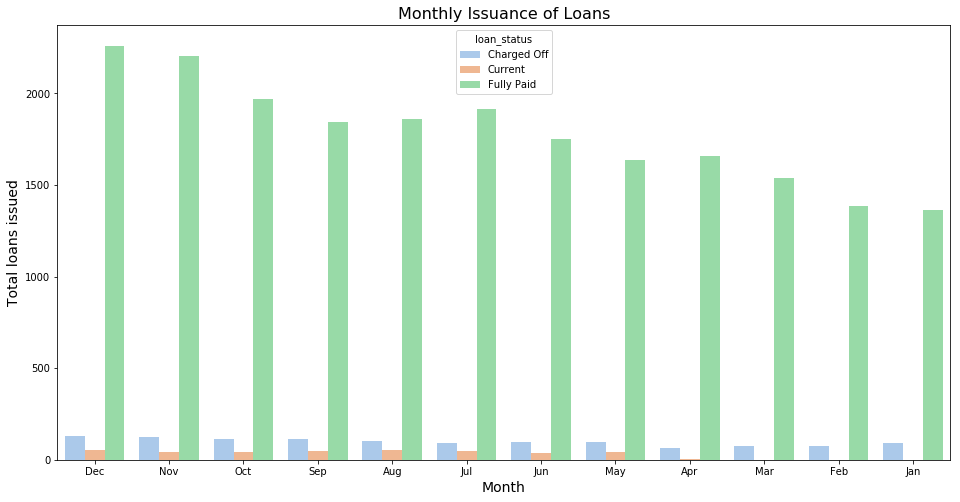

In [101]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='issue_month', hue='loan_status', data=data_loan, palette="pastel");
plt.title('Monthly Issuance of Loans', fontsize=16);
plt.xlabel('Month', fontsize=14);
plt.ylabel('Total loans issued', fontsize=14);

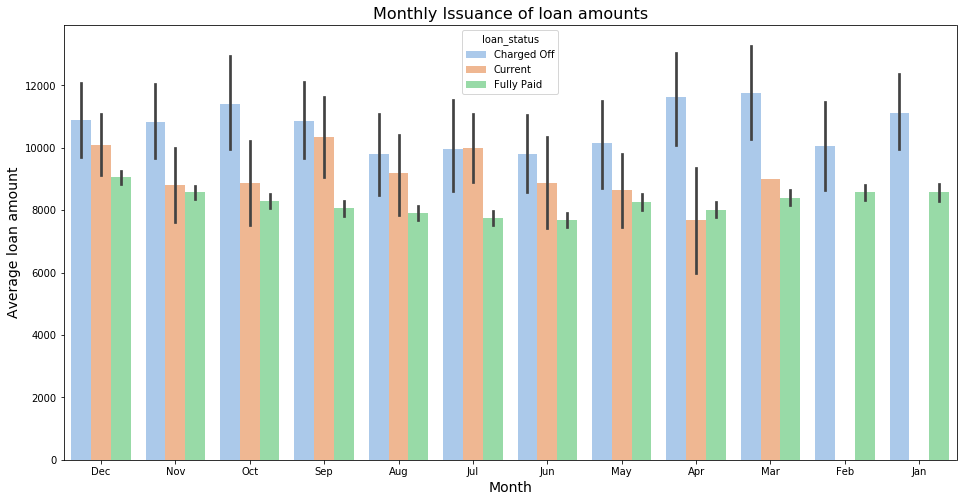

In [102]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='issue_month',y="loan_amnt", hue='loan_status', data=data_loan, palette="pastel");
plt.title('Monthly Issuance of loan amounts', fontsize=16);
plt.xlabel('Month', fontsize=14);
plt.ylabel('Average loan amount', fontsize=14);

### Derived variable : income_category

### Determine the effects of income category on loan status, loan amount and interest rate

### Insights:
1. Most of the loans issued belong to low income category
2. Borrowers beloning to low income category have a much higher chance of being charged off on their loans.
2. Borrowers belonging to high income category enjoy higher loan amounts than people from low and medium income categories.
3. Loans that were borrowed by the low income category are offered higher interest rates as medium and high income categories. Interestingly, people on the income income brakcet enjoy lower interest rates across loan types
4. Borrowers with high and medium annual incomes have a longer employment length than people with lower incomes.


In [103]:
# Let's create categories for annual_income into Low, Medium and High

data_loan['income_category'] = np.nan
data_loan.loc[data_loan['annual_inc'] <= 50000, 'income_category'] = 'Low'
data_loan.loc[(data_loan['annual_inc'] > 50000) & (data_loan['annual_inc'] <= 100000), 'income_category'] = 'Medium'
data_loan.loc[data_loan['annual_inc'] > 100000, 'income_category'] = 'High'
data_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year,issue_month,income_category
0,5000,36 months,10.65,2.0,B2,10.0,RENT,24000.0,Verified,December-2011,...,0,13648,83.7,9,January-2015,171.62,May-2016,2011,Dec,Low
2,2400,36 months,15.96,3.0,C5,10.0,RENT,12252.0,Not Verified,December-2011,...,0,2956,98.5,10,June-2014,649.91,May-2016,2011,Dec,Low
3,10000,36 months,13.49,3.0,C1,10.0,RENT,49200.0,Source Verified,December-2011,...,0,5598,21.0,37,January-2015,357.48,April-2016,2011,Dec,Low
5,5000,36 months,7.90,1.0,A4,3.0,RENT,36000.0,Source Verified,December-2011,...,0,7963,28.3,12,January-2015,161.03,January-2016,2011,Dec,Low
6,7000,60 months,15.96,3.0,C5,8.0,RENT,47004.0,Not Verified,December-2011,...,0,17726,85.6,11,May-2016,1313.76,May-2016,2011,Dec,Low


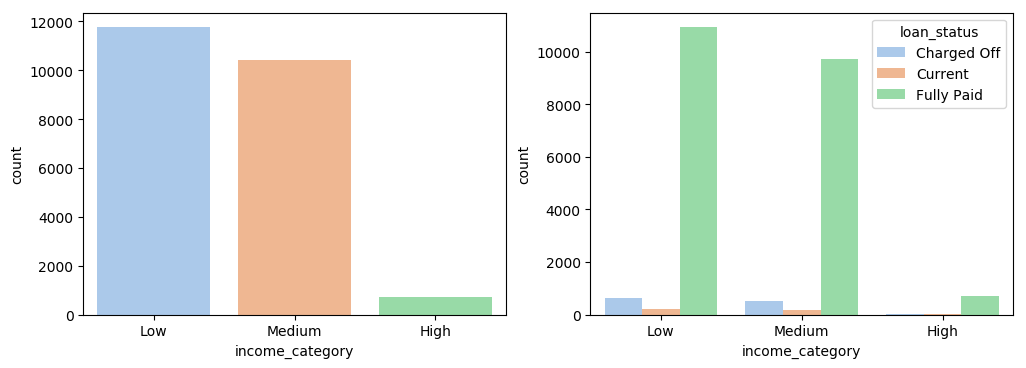

In [104]:
# Bar plot showing income category by number of loans issued and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 4),  dpi=100)

sns.countplot(x='income_category', data=data_loan, palette='pastel', ax=x1);

sns.countplot(x='income_category', hue="loan_status", data=data_loan, palette='pastel', ax=x2);


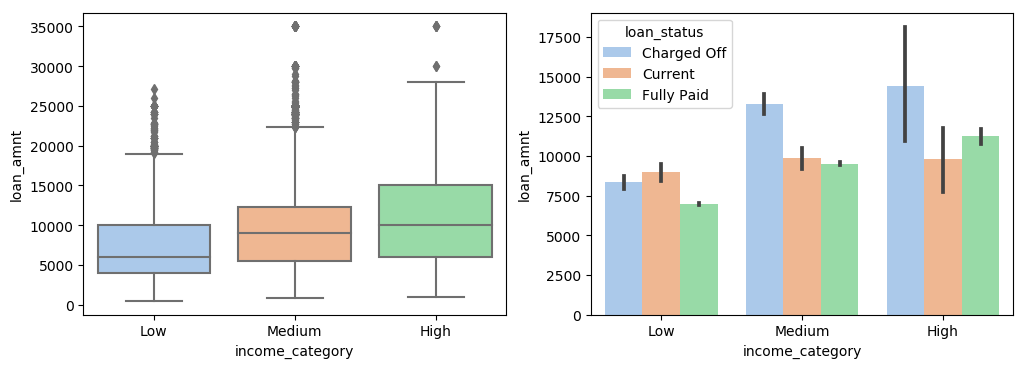

In [105]:
# Bar plot showing income category by average loan amount and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 4),  dpi=100)

sns.boxplot(x='income_category', y="loan_amnt",  data=data_loan, palette='pastel', ax=x1);

sns.barplot(x='income_category', y="loan_amnt", hue="loan_status", data=data_loan, palette='pastel', ax=x2);


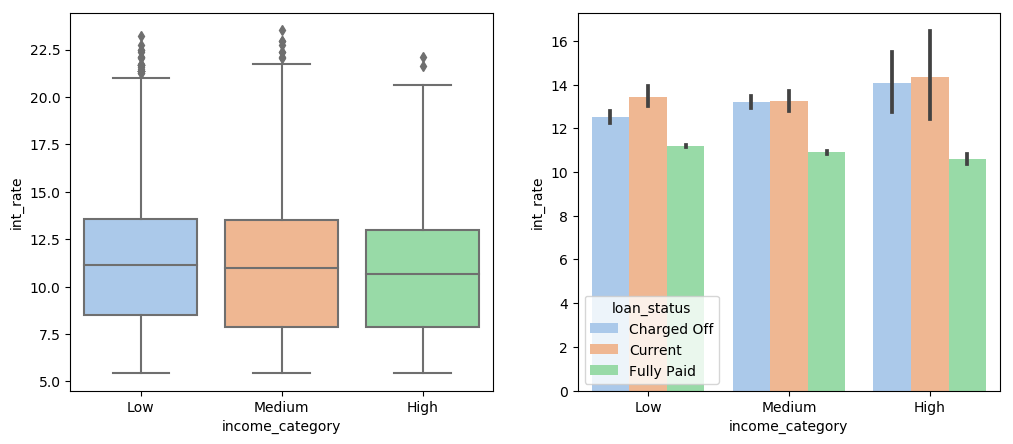

In [106]:
# Bar plot showing income category by average interest rates and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 5),  dpi=100)

sns.boxplot(x='income_category', y="int_rate", data=data_loan, palette='pastel', ax=x1);


sns.barplot(x='income_category', y="int_rate", hue="loan_status", data=data_loan, palette='pastel', ax=x2);


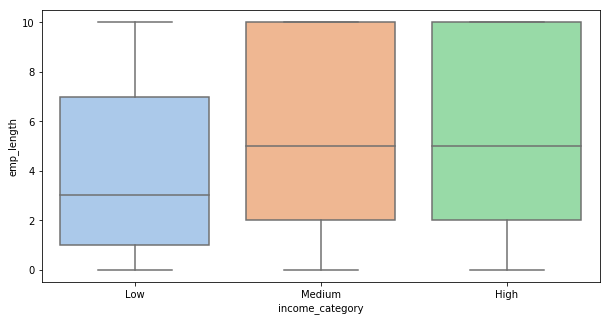

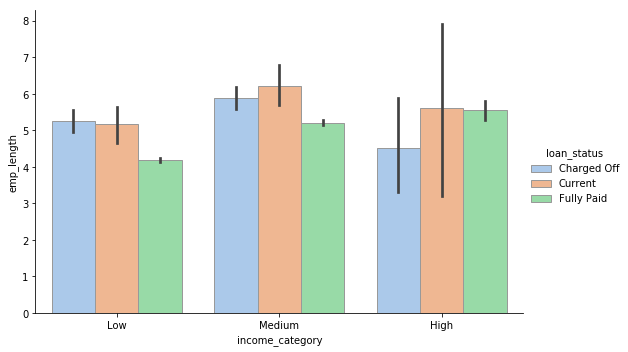

In [107]:
# Category plot showing income category by employment length across loan status
plt.figure(figsize=(10,5))
sns.boxplot(x='income_category', y="emp_length", 
            data=data_loan, palette='pastel');
sns.catplot(x='income_category', y="emp_length", hue="loan_status",
            kind="bar", edgecolor=".6",aspect=1.5,
            data=data_loan, palette='pastel');



### Derived variable: dti_bracket

### Determine effect of dti_bracket on loan status, loan amount and interest rate

### Insights
1. Most of the loans issued belong to borrowers with a debt to income ratio between 10 to 15
2. Most of the charged off loans also belong to a dti bracket to 10-15, closely followed by a dti range of 15-20
3. Average loan amounts do not vary significantly with increase with increase in dti 
4. Average interest rates increase with increase in dti 

In [108]:
#Creating new feature for dti for getting the percentage distribution of loans for various dti's
data_loan['dti_bracket'] = np.nan
data_loan.loc[(data_loan['dti'] >= 0) & (data_loan['dti'] < 5), 'dti_bracket'] = '0-5'
data_loan.loc[(data_loan['dti'] >= 5) & (data_loan['dti'] < 10), 'dti_bracket'] = '0-10'
data_loan.loc[(data_loan['dti'] >= 10) & (data_loan['dti'] < 15), 'dti_bracket'] = '10-15'
data_loan.loc[(data_loan['dti'] >= 15) & (data_loan['dti'] < 20), 'dti_bracket'] = '15-20'
data_loan.loc[(data_loan['dti'] >= 20) & (data_loan['dti'] < 25), 'dti_bracket'] = '20-25'
data_loan.loc[(data_loan['dti'] >= 25) & (data_loan['dti'] < 30), 'dti_bracket'] = '25-30'

data_loan[['dti','dti_bracket']].head()


,dti,dti_bracket
0,27.65,25-30
2,8.72,0-10
3,20.00,20-25
5,11.20,10-15
6,23.51,20-25


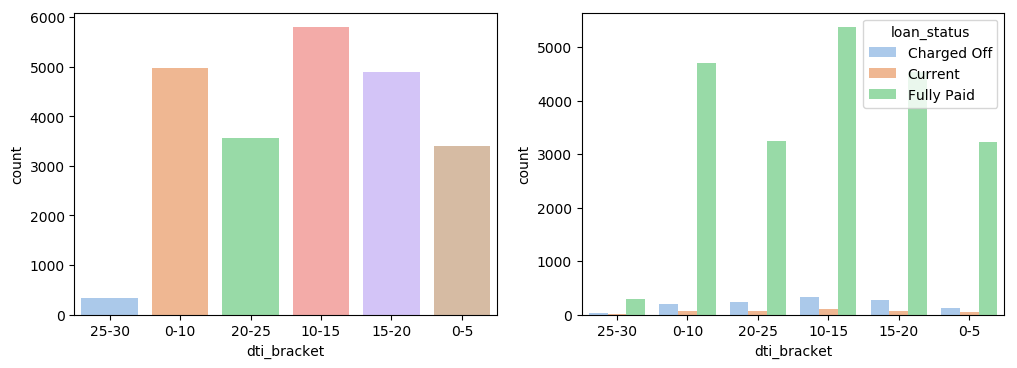

In [109]:
# Bar plot showing debt to income ratio by number of loans issued and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 4),  dpi=100)

sns.countplot(x='dti_bracket', data=data_loan, palette='pastel', ax=x1);

sns.countplot(x='dti_bracket', hue="loan_status", data=data_loan, palette='pastel', ax=x2);


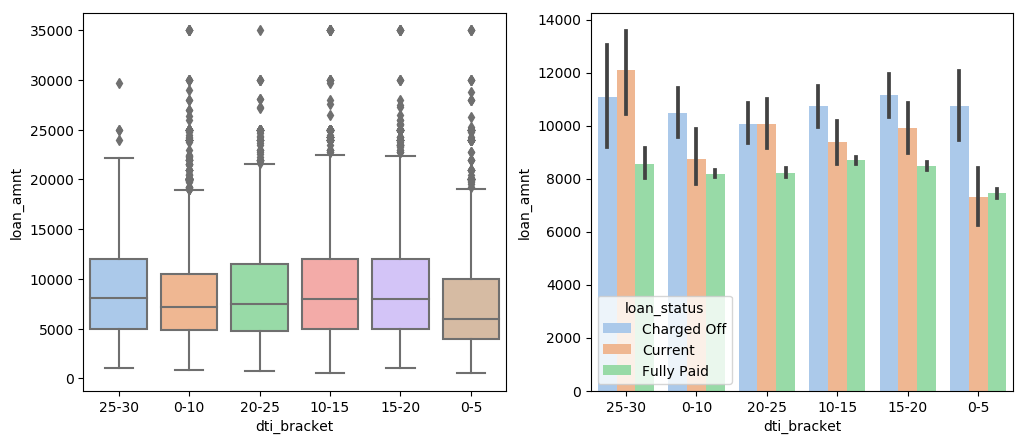

In [110]:
# Bar plot showing debt to income ratio by average loan amount and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 5),  dpi=100)

sns.boxplot(x='dti_bracket', y="loan_amnt",  data=data_loan, palette='pastel', ax=x1);

sns.barplot(x='dti_bracket', y="loan_amnt", hue="loan_status", data=data_loan, palette='pastel', ax=x2);



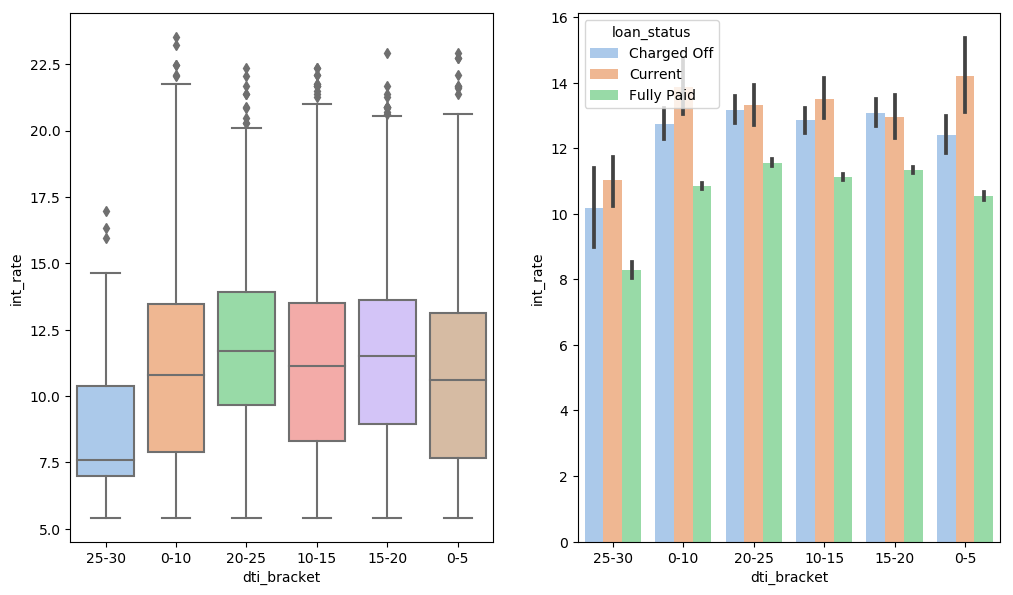

In [111]:
# Bar plot showing debt to income ratio by average loan amount and loan status

f, (x1, x2) = plt.subplots(1, 2, figsize=(12, 7),  dpi=100)

sns.boxplot(x='dti_bracket', y="int_rate",  data=data_loan, palette='pastel', ax=x1);

sns.barplot(x='dti_bracket', y="int_rate", hue="loan_status", data=data_loan, palette='pastel', ax=x2);



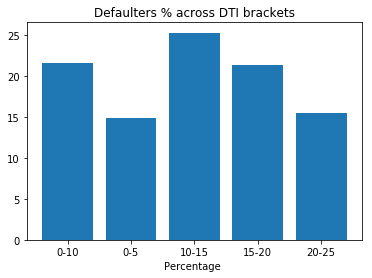

In [112]:
#Plot showing charged off % across DTI brackets

groupedvalues_dti_bar=data_loan.groupby(['dti_bracket']).count().reset_index()


groupedvalues_dti_bar['dti_br_perc'] = np.nan

for i in range(0,len(groupedvalues_dti_bar)-1):
    groupedvalues_dti_bar['dti_br_perc'][i]=(groupedvalues_dti_bar['loan_amnt'][i]/sum(groupedvalues_dti_bar['loan_amnt']))*100
#loan_amnt is simply taken to get the count as the data is already aggregated by dti bracket

groupedvalues_dti_bar[['dti_bracket','dti_br_perc']]

plt.bar(list(groupedvalues_dti_bar['dti_bracket']), list(groupedvalues_dti_bar['dti_br_perc']), align='center', alpha=1)

plt.xlabel('Percentage ')
plt.title('Defaulters % across DTI brackets')
 
plt.show()


### Pivot tables for quick insights

In [113]:
#Interest rate Pivot view compared to status, tenure and dti bracket
pd.pivot_table(data_loan,index=["loan_status","term","dti_bracket"],values=["int_rate"],aggfunc=[np.mean])

mean
                                     int_rate
loan_status term       dti_bracket           
Charged Off  36 months 0-10         11.710977
                       0-5          11.798554
                       10-15        11.563719
                       15-20        11.999783
                       20-25        12.163585
                       25-30         8.214545
             60 months 0-10         14.982258
                       0-5          13.772895
                       10-15        14.961066
                       15-20        15.117010
                       20-25        15.174625
                       25-30        11.860000
Current      60 months 0-10         13.853235
                       0-5          14.215814
                       10-15        13.489100
                       15-20        12.967500
                       20-25        13.317500
                       25-30        11.026842
Fully Paid   36 months 0-10         10.526481
                       0-5          10.181858
                       10-15        10.767570
                       15-20        10.998515
                       20-25        11.194764
                       25-30         7.720544
             60 months 0-10         13.299768
                       0-5          13.094015
                       10-15        13.260027
                       15-20        13.436483
                       20-25        13.653650
                       25-30        10.889038

In [114]:
#Annual income Pivot view compared to status, tenure and verification status
pd.pivot_table(data_loan,index=["loan_status","term","verification_status"],values=["annual_inc"],aggfunc=[np.median])

#Insights: Low annual income people have a tendency to default on their loans irrespective of the loan term


median
                                           annual_inc
loan_status term       verification_status           
Charged Off  36 months Not Verified           45000.0
                       Source Verified        42000.0
                       Verified               50680.0
             60 months Not Verified           50000.0
                       Source Verified        52000.0
                       Verified               54000.0
Current      60 months Not Verified           51996.0
                       Source Verified        47304.0
                       Verified               49000.0
Fully Paid   36 months Not Verified           48996.0
                       Source Verified        49800.0
                       Verified               56000.0
             60 months Not Verified           48000.0
                       Source Verified        48698.0
                       Verified               55000.0

In [115]:
#Interest rate Pivot view compared to status, tenure and income_category
pd.pivot_table(data_loan,index=["loan_status","term","income_category"],values=["int_rate"],aggfunc=[np.mean])

mean
                                         int_rate
loan_status term       income_category           
Charged Off  36 months High             12.522000
                       Low              11.667664
                       Medium           11.939553
             60 months High             16.998750
                       Low              14.488556
                       Medium           15.053779
Current      60 months High             14.367000
                       Low              13.442010
                       Medium           13.237636
Fully Paid   36 months High             10.241691
                       Low              10.843503
                       Medium           10.566698
             60 months High             13.032414
                       Low              13.457744
                       Medium           13.150169